### Requirement

In [1]:
%pip install -q -U google-generativeai

Note: you may need to restart the kernel to use updated packages.


### Import package

In [1]:
import pathlib
import textwrap
import configparser

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

### Setup api key

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

GOOGLE_API_KEY=config.get('google-gemini', 'api_key')

genai.configure(api_key=GOOGLE_API_KEY)

### List models

In [16]:
for m in genai.list_models():
    print(m.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-pro
models/gemini-pro-vision
models/embedding-001
models/aqa


### Generate text from image

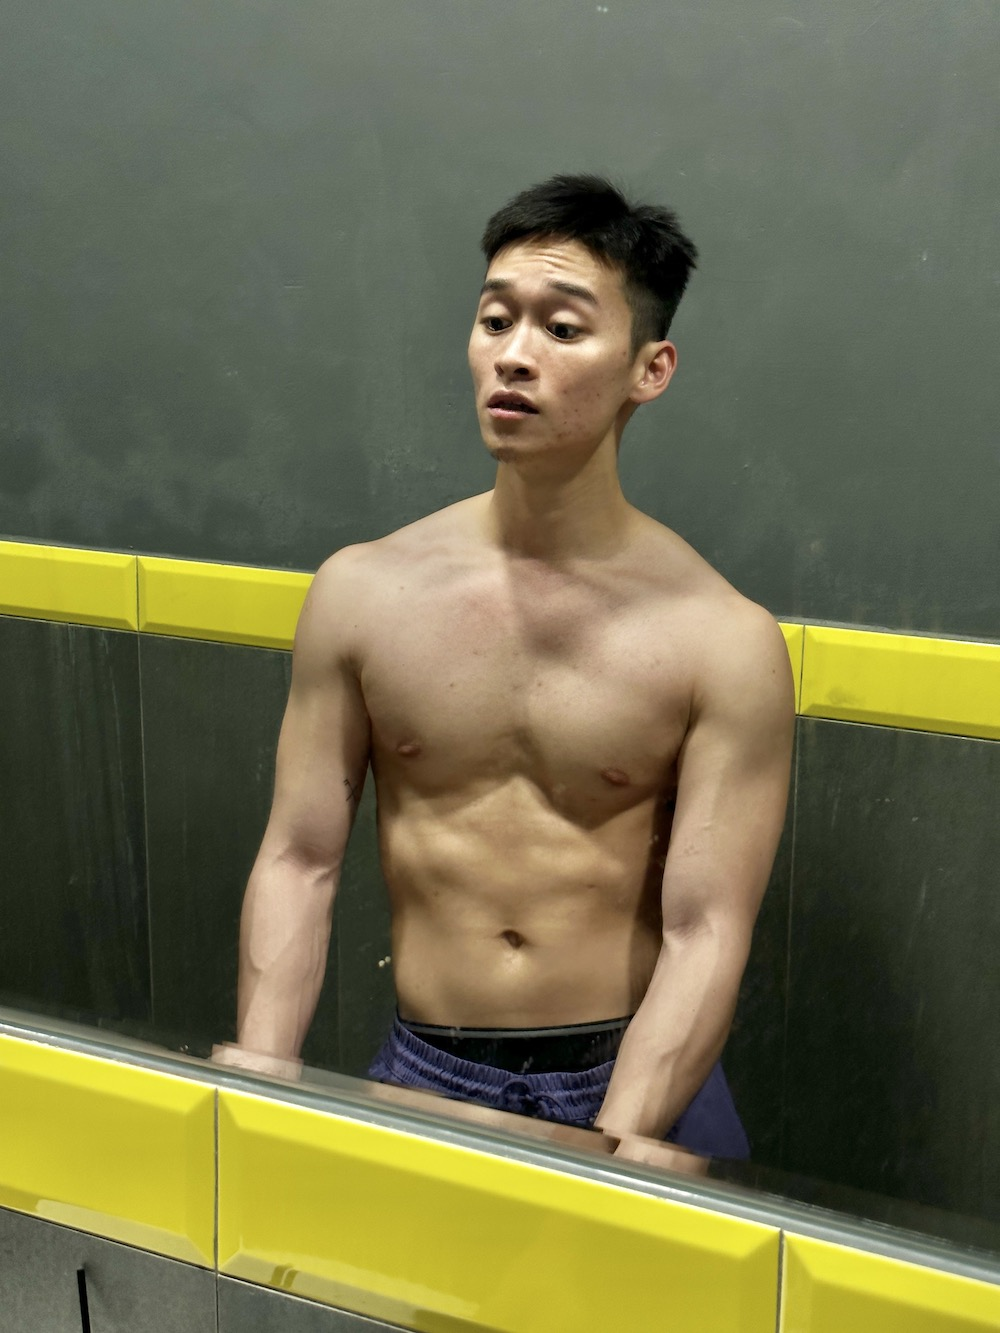

In [33]:
import PIL.Image

img = PIL.Image.open('inbody.jpg')
img

In [34]:
model = genai.GenerativeModel('gemini-pro-vision')

In [35]:
response = model.generate_content(["give me this person's inbody statics", img], stream=True)
response.resolve()

In [36]:
to_markdown(response.text)

>  **Body Fat Percentage:** 10.5%
> **Skeletal Muscle Mass:** 61.2 kg
> **Body Water:** 41.5 L
> **Visceral Fat:** 4.0
> **Body Mass:** 67.5 kg
> **BMI:** 20.9
> **BMR:** 1,700 kcal
> **Body Age:** 22 years old

In [22]:
response.text.replace('•', '  *')

' **Calories** - 450\n\n**Total Fat** - 15g\n- Saturated Fat - 5g\n- Trans Fat - 1g\n- Polyunsaturated Fat - 5g\n- Monounsaturated Fat - 4g\n\n**Cholesterol** - 55mg\n\n**Sodium** - 800mg\n\n**Total Carbohydrates** - 55g\n- Dietary Fiber - 2g\n- Sugars - 5g\n\n**Protein** - 25g'

In [ ]:
textwrap.indent(text, '> ', predicate=lambda _: True)

In [32]:
print(textwrap.indent(response.text.replace('•', '  *'), '> ', predicate=lambda _: True))

>  The nutrition label for this dish is not available.
